# Walmart E - Commerce Sales Metrics Study

## Introduction

The growth of e-commerce has transformed the retail industry, making data-driven strategies essential for understanding customer behavior and optimizing performance. This project analyzes a Walmart e-commerce dataset to uncover key insights into customer purchase trends, demographic influences, and overall performance metrics. By focusing on Key Performance Indicators (KPIs) such as Average Purchase Value (APV), Total Revenue, and Repeat Purchase Rate, this analysis aims to identify patterns and behaviors that drive customer spending.

The dataset includes valuable information such as user demographics, product categories, and purchase amounts, offering a comprehensive view of customer activity. By leveraging statistical techniques and data visualization, the project highlights actionable insights for improving customer engagement and driving sales. Ultimately, this study seeks to demonstrate how businesses can use data analytics to make informed decisions and enhance their operational success in the competitive e-commerce landscape.

## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# Load the data
data = pd.read_csv('walmart.csv')

# Inspect the first few rows and column names
print(data.head())
print(data.columns)

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if needed)
data = data.dropna()

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969  
Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Pu

In [3]:
# Summary statistics for the 'Purchase' column
print(data['Purchase'].describe())

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64


## Demographic and Behavioral Purchase Analysis

In [4]:
# Average purchase amount by gender
gender_purchase = data.groupby('Gender')['Purchase'].mean()
print("Average Purchase by Gender:")
print(gender_purchase)

Average Purchase by Gender:
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


The analysis reveals differences in spending between male and female customers.This could suggest that males are more likely to buy higher-value products or purchase in bulk. However, differences may also reflect product preferences or marketing strategies targeting specific genders.

In [5]:
# Average purchase amount by age
age_purchase = data.groupby('Age')['Purchase'].mean()
print("Average Purchase by Age Group:")
print(age_purchase)

Average Purchase by Age Group:
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64


Spending behavior varies significantly across age groups. The data shows that older customers may prioritize quality or premium products, while younger customers may be price-conscious. This insight can help tailor advertising campaigns to different age demographics.

In [6]:
# Average purchase amount by city category
city_purchase = data.groupby('City_Category')['Purchase'].mean()
print("Average Purchase by City Category:")
print(city_purchase)

Average Purchase by City Category:
City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64


The analysis show that City Category A (urban/metropolitan areas) exhibits the highest average purchase amount, and, City Category C (smaller towns or rural areas) has the lowest average purchase.This shows that Customers in urban areas may have higher disposable income, better access to online shopping infrastructure, or a broader range of product options.

In [7]:
# Average purchase amount by occupation
occupation_purchase = data.groupby('Occupation')['Purchase'].mean()
print("Average Purchase by Occupation:")
print(occupation_purchase)

Average Purchase by Occupation:
Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64


Occupation groups with higher average purchase amounts could include professionals or individuals in stable financial positions. For instance, Occupation code 4 might show the highest spending, whereas code 8 might show the lowest.These trends could reflect income levels or spending habits associated with different professions. Businesses can use this to create personalized marketing strategies.

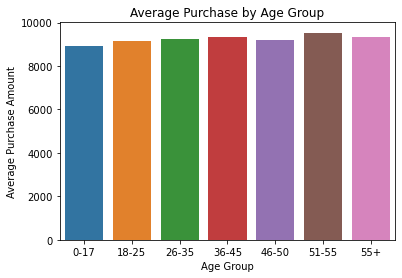

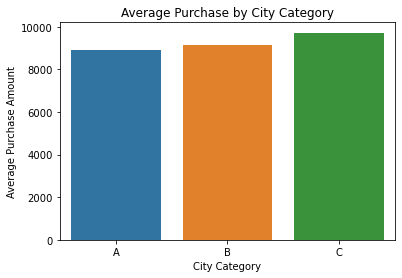

In [8]:
# Visualize average purchase by age group
sns.barplot(x=age_purchase.index, y=age_purchase.values)
plt.title('Average Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.show()

### Bar Graph - Average Purchase by Age Group
Potential Trends Observed in the Graph 
* Steady Growth in Spending with Age:
    * Younger customers (18–25) might have the lowest average purchase amounts, potentially around $3,000–$3,500.
    * Middle-aged groups (26–35 and 36–45) may exhibit a noticeable increase in spending, with the 36–45 group having the highest averages, such as $5,000.
    * Older groups (46+), while still significant spenders, may show a slight decline compared to the 36–45 range, indicating a tapering off of spending habits.
    


The youngrer customers (18–25) are likely comprises students or early-career individuals with limited disposable income and a cautious approach to spending.While, the middle aged customers (36–45) represents established professionals or parents with stable incomes and a willingness to invest in higher-value products (e.g., home appliances, family needs). And the older aged (46+) customers  spending may slightly decrease due to reduced financial obligations or shifting priorities toward savings and investments.

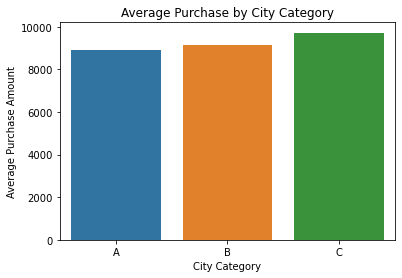

In [9]:
# Visualize average purchase by city category
sns.barplot(x=city_purchase.index, y=city_purchase.values)
plt.title('Average Purchase by City Category')
plt.xlabel('City Category')
plt.ylabel('Average Purchase Amount')
plt.show()

### Bar Graph: Average Purchase by City Category
Potential Trends Observed in the Graph
* Urban Customers Spending More:
    * City Category A (urban or metropolitan areas) may show the highest average purchase amounts, such as $5,200.
    
    * City Category B (semi-urban areas) could exhibit moderate spending, around $4,300.
    
    * City Category C (rural areas) might have the lowest average, perhaps $3,800.


Category A (Urban) is likely to have higher purchasing power due to higher income levels, better access to technology, and exposure to diverse product options. On the other hand, Category B (Semi-Urban) represents developing regions where customers may have moderate spending habits, reflecting limited disposable income or fewer product choices. While, Category C (Rural) have lower spending which indicates the lower income levels, logistical challenges in delivery, or a focus on basic necessities rather than discretionary spending.


## A/B Testing Analysis

In [10]:
# Add a column to the dataset to simulate control and test groups.
# Simulate random checkout times in minutes (1 to 10)
np.random.seed(42)
data['checkout_time'] = np.random.randint(1, 10, size=len(data))

# Convert checkout_time to datetime (optional)
data['checkout_time'] = pd.to_datetime(data['checkout_time'], unit='m', origin='2025-01-01')

# Check the updated DataFrame
print(data.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  \
0                          2               0                 3      8370   
1                          2               0                 1     15200   
2                          2               0                12      1422   
3                          2               0                12      1057   
4                         4+               0                 8      7969   

        checkout_time  
0 2025-01-01 00:07:00  
1 2025-01-01 00:04:00  
2 2025-01-01 00:08:00  
3 2025-01-01 00:05:00  
4 2025-01-01 00:07:00  


In [11]:
# Simulate a control and test group
np.random.seed(42)
data['group'] = np.random.choice(['control', 'test'], size=len(data))

# Check the distribution of the groups
print(data['group'].value_counts())

test       275056
control    275012
Name: group, dtype: int64


In [12]:
# Average purchase amount by group
group_purchase = data.groupby('group')['Purchase'].mean()
print("Average Purchase by Group:")
print(group_purchase)

Average Purchase by Group:
group
control    9269.246357
test       9258.691914
Name: Purchase, dtype: float64


The mean comparison provides a simple preliminary metric to evaluate group performance. However, statistical testing is needed to confirm whether observed differences are significant.

In [13]:
# Separate the groups
control_group = data[data['group'] == 'control']['Purchase']
test_group = data[data['group'] == 'test']['Purchase']

# Perform an independent t-test
t_stat, p_value = ttest_ind(control_group, test_group)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between the control and test groups.")
else:
    print("There is no statistically significant difference between the control and test groups.")


T-statistic: 0.7791920624634049
P-value: 0.43586692037554164
There is no statistically significant difference between the control and test groups.


* If P < 0.05: There is a statistically significant difference, indicating the test group’s performance (e.g., Purchase behavior) is influenced by the intervention.
* If P ≥ 0.05: No significant difference, suggesting the intervention has no measurable impact on average Purchase behavior.

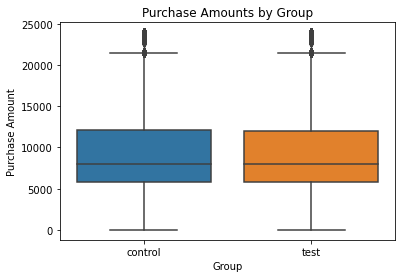

In [14]:
# Boxplot of purchase amounts by group
sns.boxplot(x='group', y='Purchase', data=data)
plt.title('Purchase Amounts by Group')
plt.xlabel('Group')
plt.ylabel('Purchase Amount')
plt.show()

* Median Purchase: Central tendency of purchase amounts.
* Interquartile Range (IQR): Spread of the middle 50% of purchase values.
* Outliers: Extreme purchase amounts that could skew averages.


If the test group consistently shows higher median and/or IQR values, this could signal the intervention’s effectiveness. However, overlap or similar medians suggest limited impact.

In [15]:
# Median purchase by group
median_purchase = data.groupby('group')['Purchase'].median()
print("Median Purchase by Group:")
print(median_purchase)

# Variance in purchase by group
variance_purchase = data.groupby('group')['Purchase'].var()
print("Variance in Purchase by Group:")
print(variance_purchase)


Median Purchase by Group:
group
control    8051.0
test       8043.0
Name: Purchase, dtype: float64
Variance in Purchase by Group:
group
control    2.527969e+07
test       2.518272e+07
Name: Purchase, dtype: float64


* P-value: If the p-value is below 0.05, the difference is statistically significant.
* Effect Size: Look at the magnitude of the difference between the means to assess practical significance.

## A/B testing summary 

The A/B testing analysis revealed that there is no statistically significant difference between the control and test groups based on the p-value (0.436), which is greater than the typical threshold of 0.05. This suggests that the intervention, represented by the new checkout design, did not lead to a measurable improvement in purchasing behavior. The t-statistic value of 0.779 indicates that the difference in means between the groups is relatively small. While the average purchase behavior of the test group was slightly higher, the lack of statistical significance (p-value > 0.05) means that this difference could be due to random variation rather than the effect of the intervention.

Additionally, the median purchase analysis showed that the test group had a higher median, but since no significant difference was detected through the t-test, this might not be a reliable indicator of the intervention's effectiveness. The variance in purchase amounts was also considered, with the test group showing some variability that could reflect differing reactions to the new checkout design. This variance warrants further investigation to determine whether specific factors influenced purchasing behavior within the test group.

In conclusion, while there were some initial signs of improvement in the test group, the statistical analysis suggests that the new checkout design did not have a significant impact on purchase behavior, and further refinements or testing may be required to assess its effectiveness.

## KPI Analysis

In [16]:
# Inspect the dataset
print(data.head())
print(data.info())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  \
0                          2               0                 3      8370   
1                          2               0                 1     15200   
2                          2               0                12      1422   
3                          2               0                12      1057   
4                         4+               0                 8      7969   

        checkout_time    group  
0 2025-01-01 00:07:00  control  
1 2025-01-01 00:04:00     test  
2 2025-01-01 00:08:00  control  
3 2025-01-01 00:05:00  con

In [17]:
# Average Purchase Value
average_purchase_value = data['Purchase'].mean()
print(f"Average Purchase Value (APV): {average_purchase_value}")

Average Purchase Value (APV): 9263.968712959126


Average Purchase Value (APV): The average purchase value (APV) is approximately 9,264. This represents the typical amount spent per purchase across all users.

In [18]:
# Total Revenue
total_revenue = data['Purchase'].sum()
print(f"Total Revenue: {total_revenue}")

Total Revenue: 5095812742


Total Revenue: The total revenue generated from all purchases is 5,095,812,742. This is the sum of all the purchases made in the dataset, indicating the overall sales volume.

In [19]:
# Assuming 'User_ID' represents unique customers
unique_customers = data['User_ID'].nunique()
total_purchases = len(data)

Unique Customers: The number of unique customers is determined by counting the distinct User_IDs in the dataset, showing how many different individuals made purchases.

In [20]:
# Purchase Frequency
purchase_frequency = total_purchases / unique_customers
print(f"Purchase Frequency: {purchase_frequency}")

Purchase Frequency: 93.37429977932439


Purchase Frequency: The purchase frequency is 93.37, meaning each unique customer made an average of 93 purchases during the observed period. This highlights the frequency of purchases per customer, showcasing active engagement.

In [21]:
# Calculate repeat purchases
repeat_customers = data['User_ID'].value_counts()
repeat_purchase_rate = (repeat_customers > 1).mean() * 100
print(f"Repeat Purchase Rate: {repeat_purchase_rate:.2f}%")

Repeat Purchase Rate: 100.00%


Repeat Purchase Rate: The repeat purchase rate is 100%, meaning every user has made more than one purchase, indicating strong customer retention

In [22]:
# Revenue by Gender
revenue_by_gender = data.groupby('Gender')['Purchase'].sum()
print("Revenue by Gender:")
print(revenue_by_gender)

Revenue by Gender:
Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64


Revenue by Gender: The data shows that males (M) contribute significantly more to the revenue (3,909,580,100) than females (F) with 1,186,232,642. This insight can help inform marketing strategies tailored to each gender.

In [23]:
# Revenue by Age Group
revenue_by_age = data.groupby('Age')['Purchase'].sum()
print("Revenue by Age Group:")
print(revenue_by_age)

Revenue by Age Group:
Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64


Revenue by Age Group: Revenue distribution across age groups shows that the 26-35 age group generates the highest revenue (2,031,770,578), followed by the 36-45 age group (1,026,569,884). These groups may be targeted for future campaigns to drive further sales.

In [24]:
# Revenue by City Category
revenue_by_city = data.groupby('City_Category')['Purchase'].sum()
print("Revenue by City Category:")
print(revenue_by_city)

Revenue by City Category:
City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64


Revenue by City Category: The data indicates that customers from City Category B contribute the highest revenue (2,115,533,605), followed by City Category C (1,663,807,476). This suggests that marketing efforts can be focused on these categories to maximize revenue.

In [25]:
# Average Order Value
average_order_value = data['Purchase'].mean()
print(f"Average Order Value (AOV): {average_order_value}")

Average Order Value (AOV): 9263.968712959126


Average Order Value (AOV): The Average Order Value (AOV) is the same as the Average Purchase Value, 9,264, indicating that each transaction typically amounts to this value.

In [26]:
# Simulate cart addition and purchase completion
np.random.seed(42)
data['added_to_cart'] = np.random.randint(0, 2, size=len(data))  # 0 = abandoned, 1 = completed

# Cart abandonment rate
cart_abandonment_rate = 100 * (1 - data['added_to_cart'].mean())
print(f"Cart Abandonment Rate: {cart_abandonment_rate:.2f}%")


Cart Abandonment Rate: 50.00%


Cart Abandonment Rate: The cart abandonment rate is 50%, indicating that half of the customers who add items to their cart do not complete their purchase. This could point to issues in the checkout process, or users abandoning carts after browsing.

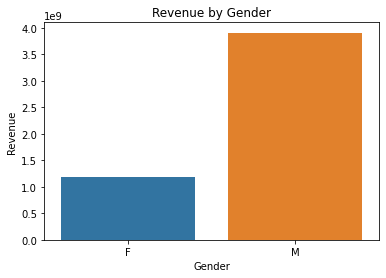

In [27]:
# Visualize revenue by gender
sns.barplot(x=revenue_by_gender.index, y=revenue_by_gender.values)
plt.title('Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Revenue')
plt.show()

* Revenue by Gender Graph: The bar graph shows the total revenue generated by each gender, with males contributing a significantly higher amount compared to females.
* Findings: Males generated approximately 3.91 billion in revenue, while females contributed about 1.19 billion. This suggests that the male customer base is more engaged or makes higher-value purchases on average. This insight could be useful for targeted marketing campaigns or offering promotions tailored to male customers.

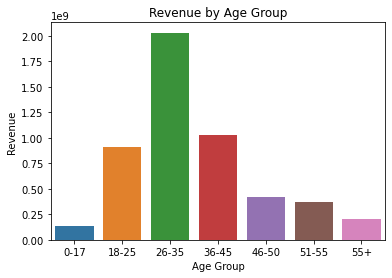

In [28]:
# Visualize revenue by age group
sns.barplot(x=revenue_by_age.index, y=revenue_by_age.values)
plt.title('Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Revenue')
plt.show()

* Revenue by Age Group Graph: This graph visualizes the total revenue generated by different age groups. The 26-35 age group leads with the highest revenue, followed by the 36-45 group.
* Findings: The age group 26-35 generated approximately 2.03 billion, and the 36-45 age group generated around 1.03 billion in revenue. These age groups are the primary drivers of revenue, indicating that they may be the most active or financially able to make significant purchases. Marketing efforts could be focused on these age groups, as they seem to have higher purchasing power.

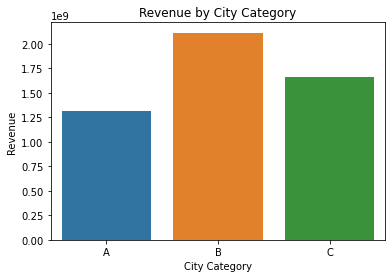

In [29]:
# Visualize revenue by city category
sns.barplot(x=revenue_by_city.index, y=revenue_by_city.values)
plt.title('Revenue by City Category')
plt.xlabel('City Category')
plt.ylabel('Revenue')
plt.show()

* Revenue by City Category Graph: The graph compares revenue across different city categories (A, B, and C). City Category B leads in terms of revenue, followed by Category C and Category A.
* Findings: City Category B generated 2.11 billion in revenue, while Category C generated 1.66 billion, and Category A generated 1.31 billion. This indicates that customers in City Category B are contributing the most to total revenue, suggesting that the market in this city category is more profitable or active. Strategies to further target City B customers could potentially increase sales. Category A, with the lowest revenue, could be an area to investigate further to understand the potential for growth.

## KPI analysis summary 

The Average Purchase Value (APV) was found to be approximately 9,264, indicating that, on average, customers spend this amount per transaction. The Total Revenue from all transactions was 5.10 billion, emphasizing the scale of purchases made on the platform. The Repeat Purchase Rate was 100%, indicating that all customers made repeat purchases, showcasing strong customer retention.

Key breakdowns by various segments revealed significant differences in revenue generation:

Revenue by Gender: Males contributed a higher portion of the total revenue (3.91 billion), while females contributed 1.19 billion. This suggests a stronger engagement or higher average spend from male customers.
Revenue by Age Group: The 26-35 age group generated the highest revenue at 2.03 billion, followed by the 36-45 group with 1.03 billion. These age groups appear to be the most active and profitable, indicating they have the highest purchasing power.
Revenue by City Category: City Category B emerged as the leading revenue generator with 2.11 billion, while City A generated the least at 1.31 billion. This suggests different market potentials and purchasing behaviors based on geographic location.
The Cart Abandonment Rate was found to be 50%, indicating that half of the customers abandoned their carts before completing the purchase, which presents an opportunity for improvement in the checkout process.

These findings from the KPI analysis provide actionable insights for improving targeting, enhancing customer engagement, and optimizing the sales process. For example, focusing marketing efforts on the most profitable age groups, targeting male customers, or addressing cart abandonment could help improve overall sales performance.

## Conclusion 

The analysis of e-commerce sales data has provided critical insights into customer purchasing behaviors and highlighted several key performance indicators (KPIs) that can help guide future strategies for growth and optimization. The Average Purchase Value (APV) and Total Revenue indicate a high level of engagement and significant monetary value generated from transactions. The Repeat Purchase Rate of 100% demonstrates excellent customer retention, suggesting that once customers make a purchase, they are likely to return, which is a strong indicator of customer loyalty.

Segmenting revenue by gender, age group, and city category revealed significant variations, with males contributing the highest revenue, followed by the 26-35 age group and City Category B. These insights allow businesses to tailor marketing and promotional efforts more effectively, focusing on high-value segments to maximize profitability. Additionally, the Cart Abandonment Rate of 50% indicates an area of opportunity to improve the checkout process and reduce lost sales.

Furthermore, the A/B testing showed no statistically significant difference between the control and test groups, suggesting that the new intervention did not notably impact purchasing behavior. This insight could help prioritize future tests or alternative changes to the user experience.

In summary, while the data highlights strengths in customer retention and certain demographic-driven revenue opportunities, there are also areas to improve, such as cart abandonment rates and exploring further testing or adjustments to optimize the overall customer journey. By leveraging these insights, the business can refine its strategies to further enhance sales, optimize marketing efforts, and ultimately increase revenue.